In [39]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [40]:
stats.bernoulli.rvs(0.25, size=5)

array([0, 1, 0, 0, 0])

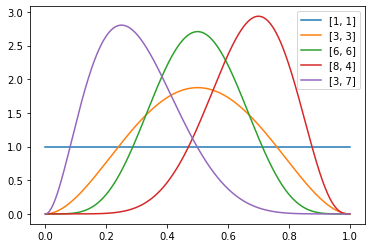

In [45]:
tmp_x = np.linspace(0, 1, 1000)

tmp_params = [
    [1, 1],
    [3, 3],
    [6, 6],
    [8, 4], 
    [3, 7],
]

for param in tmp_params:
    a, b = param[0], param[1]
    tmp_beta = stats.beta(a, b)
    tmp_posterior = tmp_beta.pdf(tmp_x)
    plt.plot(tmp_x, tmp_posterior, "-", label=param)
    plt.legend()
    
plt.show()

In [28]:
bern_5 = sum(filter(lambda n:n%2==1, stats.bernoulli.rvs(0.25, size=5)))
bern_10 = sum(filter(lambda n:n%2==1, stats.bernoulli.rvs(0.25, size=10)))
bern_25 = sum(filter(lambda n:n%2==1, stats.bernoulli.rvs(0.25, size=25)))
bern_100 = sum(filter(lambda n:n%2==1, stats.bernoulli.rvs(0.25, size=100)))

print(f"number of 0 in bern_5: {bern_5}")
print(f"number of 0 in bern_10: {bern_10}")
print(f"number of 0 in bern_25: {bern_25}")
print(f"number of 0 in bern_100: {bern_100}")

number of 0 in bern_5: 2
number of 0 in bern_10: 1
number of 0 in bern_25: 7
number of 0 in bern_100: 22


In [37]:
beta_init_params = [
    [0.5, 0.5], 
    [1.0, 1.0], 
    [10.0, 5.0], 
    [5.0, 10.0],
]

beta_cont_params = [
    [0, 0], 
    [bern_5, 5 - bern_5], 
    [bern_10, 10 - bern_10], 
    [bern_25, 25 - bern_25],
    [bern_100, 100 - bern_100],
]

X = np.linspace(0, 1, 1000)
posterior_list = []

for beta_init_param in beta_init_params:
    for beta_cont_param in beta_cont_params:
        Beta = stats.beta(
            beta_cont_param[0] + beta_init_param[0], 
            beta_cont_param[1] + beta_init_param[1],
        )
        posterior = Beta.pdf(X)
        posterior_list.append(posterior)

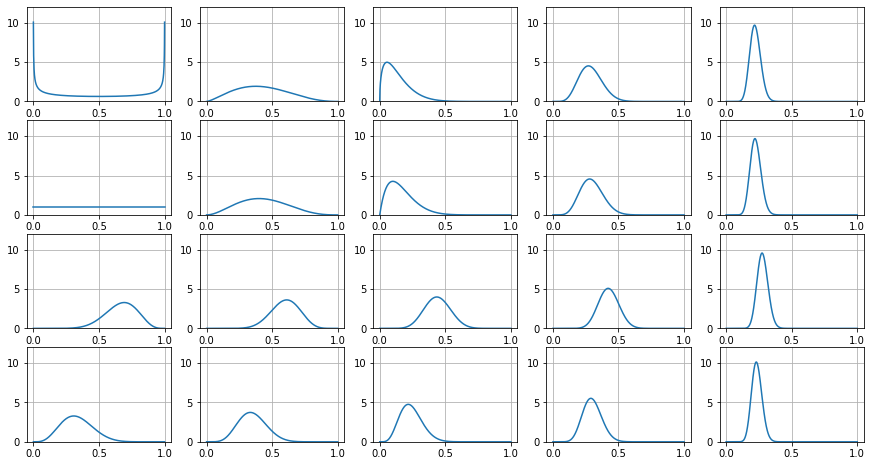

In [32]:
num_rows = len(beta_init_params)
num_cols = len(beta_cont_params)
fig, axis = plt.subplots(
    num_rows, 
    num_cols, 
    figsize=(3*num_cols, 2*num_rows),
)

for ax, y in zip(axis.flat, posterior_list):
    ax.set_ylim([0, 12])
    ax.plot(x, y)
    ax.grid(True)
    
plt.show()

In [34]:
bern_1000 = sum(filter(lambda n:n%2==1, stats.bernoulli.rvs(0.25, size=1000)))

beta_init_params = [
    [0.5, 0.5], 
    [1.0, 1.0], 
    [10.0, 5.0], 
    [5.0, 10.0],
]

beta_cont_params_1000 = [bern_1000, 100 - bern_1000]

for beta_init_param in beta_init_params:
    mu = (beta_cont_param[0] + beta_init_param[0]) / (beta_cont_param[0]+beta_init_param[0] + beta_cont_param[1]+beta_init_param[1])
    print(f"init param of beta: {beta_init_param}")
    print(f"param mu: {mu:.4f}")

init param of beta: [0.5, 0.5]
param mu: 0.2228
init param of beta: [1.0, 1.0]
param mu: 0.2255
init param of beta: [10.0, 5.0]
param mu: 0.2783
init param of beta: [5.0, 10.0]
param mu: 0.2348
